# Đề tài: Tách từ và Gán nhãn từ loại Tiếng Việt

## Chuẩn bị dữ liệu
Import các thư viện

In [1]:
#from google.colab import drive
from collections import defaultdict
import unicodedata as ud
import pandas as pd
import numpy as np
import re #Regular Expression
import ast
#drive.mount("/content/gdrive")

Mounted at /content/gdrive


Tạo các từ điển n_grams từ từ điển gốc.

In [2]:
data = open("resource/Dictionary.txt", encoding="utf-8").readlines()
print(len(data))
data[0:5]

31158


['a\n', 'A\n', 'a dua\n', 'a ha\n', 'a lô\n']

In [3]:
set_data = set(data)
print(len(set_data))

31158


In [4]:
sorted_data = sorted(set_data)
print(len(sorted_data))

31158


In [5]:
#Đếm số khoảng cách
def check_space(string):
    return string.count(" ")

#Tạo các n_grams
one_grams = set()
two_grams = set()
three_grams = set()
four_grams = set()
five_grams = set()
for word in sorted_data:
  word = word.replace('\n', '')
  if check_space(word) == 1:
    two_grams.add(word)
  elif check_space(word) == 2:
    three_grams.add(word)
  elif check_space(word) == 3:
    four_grams.add(word)
  elif check_space(word) == 4:
    five_grams.add(word)
  else:
    one_grams.add(word)

print(len(one_grams))

5766


In [6]:
print(len(two_grams))
two_grams = sorted(two_grams)
two_grams[:10]

22705


['Bắc Cực',
 'Bắc Đẩu',
 'Chức Nữ',
 'Công giáo',
 'Cựu Ước',
 'Diêm Vương',
 'El Nino',
 'Hán học',
 'Hằng Nga',
 'Hồi giáo']

In [7]:
with open("resource/my_bi_grams.txt", "w" ,encoding="utf-8") as f:
  for word in two_grams:
    f.write(f'{word}\n')

In [8]:
print(len(three_grams))
three_grams = sorted(three_grams)
three_grams[:10]

1907


['Bà La Môn',
 'Chính Thống giáo',
 'Cơ Đốc giáo',
 'Hệ Mặt Trời',
 'Mạnh Thường Quân',
 'Thiên Chúa giáo',
 'Thái Dương Hệ',
 'Tết Nguyên Đán',
 'Tết dương lịch',
 'Tết âm lịch']

In [9]:
with open("resource/my_tri_grams.txt", "w" ,encoding="utf-8") as f:
  for word in three_grams:
    f.write(f'{word}\n')

In [10]:
print(len(four_grams))
four_grams = sorted(four_grams)
four_grams[:10]

763


['Bà La Môn giáo',
 'Hội chữ thập đỏ',
 'anh em thúc bá',
 'anh hùng chủ nghĩa',
 'anh hùng cá nhân',
 'bao vây kinh tế',
 'bi ba bi bô',
 'biết tỏng tòng tong',
 'bê tông cốt sắt',
 'bê tông cốt thép']

In [11]:
with open("resource/my_quadri_grams.txt", "w" ,encoding="utf-8") as f:
  for word in four_grams:
    f.write(f'{word}\n')

In [12]:
print(len(five_grams))
five_grams = sorted(five_grams)
five_grams[:10]

17


['bảo hiểm phi nhân thọ',
 'bộ xử lí trung tâm',
 'bộ xử lý trung tâm',
 'chủ nghĩa bôn sê vích',
 'luật tố tụng dân sự',
 'luật tố tụng hình sự',
 'máy điều hoà nhiệt độ',
 'phản xạ có điều kiện',
 'phản xạ không điều kiện',
 'thuế giá trị gia tăng']

In [13]:
with open("resource/my_penta_grams.txt", "w" ,encoding="utf-8") as f:
  for word in five_grams:
    f.write(f'{word}\n')

Tải ngữ liệu thu thập từ các trang báo:
- https://thanhnien.vn/
- https://dantri.com.vn/
- https://vnexpress.net/


In [14]:
sentences = open("resource/data_sentences.txt", encoding="utf-8").readlines()

In [15]:
print(len(sentences))
sentences[0:5]

90


['Đồng bằng sông Cửu Long được ưu tiên bố trí vốn đầu tư các tuyến cao tốc, trong đó chú trọng dự án đường sắt tốc độ cao TP HCM – Cần Thơ, theo lãnh đạo Chính phủ.\n',
 'Trong nhiệm kỳ này, Chính phủ đã bố trí khoảng 400.000 tỷ đồng cho hạ tầng giao thông, gấp 3-4 lần nhiệm kỳ trước.\n',
 'Quan điểm này có cơ sở khoa học nhất định khi nhiều nghiên cứu trên thế giới chỉ ra rằng điểm học bạ phổ thông có tương quan tỷ lệ thuận với mức độ sẵn sàng học tập (readiness) của sinh viên.\n',
 'Một trường đại học tốt không phải trường tuyển sẵn các ứng viên tài giỏi, mà là nơi nỗ lực tạo ra môi trường học thuật giúp thúc đẩy các phẩm chất tiềm tàng trong người học, từ đó khẳng định giá trị của tri thức là bình đẳng với mọi học viên.\n',
 'Xây dựng nút giao hai tầng kết nối với cao tốc Cầu Giẽ - Ninh Bình.\n']

## Phân tích hình thái: Tách từ tiếng Việt
Tách từ sử dụng Longest Matching

In [16]:
#Sử dụng Regular Expression tách các âm tiết (syllables) trong mỗi câu, lưu thành 1 list
def syllablize(sentence):
    word = '\w+'
    non_word = '[^\w\s]'
    digits = '\d+([\.,_]\d+)+'
    date_or_fraction = '(\d{1,2}[/-]\d{1,2}[/-]\d{1,4}|\d{1,6}[/-]\d{1,6})'
    patterns = []
    patterns.extend([date_or_fraction, digits, word, non_word])
    patterns = f"({'|'.join(patterns)})"
    sentence = ud.normalize('NFC', sentence)
    tokens = re.findall(patterns, sentence, re.UNICODE)
    return [token[0] for token in tokens]

#Load các file n_grams đã xây dựng
def load_n_grams(path):
    with open(path, encoding='utf8') as f:
      words = f.read().split('\n')
    return words

#Thuật toán Longest Matching
def longest_matching(sentence, bi_grams, tri_grams, quadri_grams, penta_grams):
    syllables = syllablize(sentence)
    syl_len = len(syllables)

    curr_id = 0
    word_list = []
    done = False

    while curr_id < syl_len and not done:
      curr_word = syllables[curr_id]
      if curr_id >= syl_len - 1:
        word_list.append(curr_word)
        done = True
      else:
        second_word = syllables[curr_id + 1]
        pair_word = ' '.join([curr_word, second_word])
        if curr_id >= syl_len - 2:
          if (pair_word in bi_grams) or (pair_word.lower() in bi_grams):
            word_list.append('_'.join([curr_word, second_word]))
            curr_id += 2
          else:
            word_list.append(curr_word)
            curr_id += 1
        else:
          third_word = syllables[curr_id + 2]
          triple_word = ' '.join([pair_word, third_word])
          if curr_id >= syl_len - 3:
            if (triple_word in tri_grams) or (triple_word.lower() in tri_grams):
              word_list.append('_'.join([curr_word, second_word, third_word]))
              curr_id += 3
            elif (pair_word in bi_grams) or (pair_word.lower() in bi_grams):
              word_list.append('_'.join([curr_word, second_word]))
              curr_id += 2
            else:
              word_list.append(curr_word)
              curr_id += 1
          else:
            fourth_word = syllables[curr_id + 3]
            quadra_word = ' '.join([triple_word, fourth_word])
            if curr_id >= syl_len - 4:
              if (quadra_word in quadri_grams) or (quadra_word.lower() in quadri_grams):
                word_list.append('_'.join([curr_word, second_word, third_word, fourth_word]))
                curr_id += 4
              elif (triple_word in tri_grams) or (triple_word.lower() in tri_grams):
                word_list.append('_'.join([curr_word, second_word, third_word]))
                curr_id += 3
              elif (pair_word in bi_grams) or (pair_word.lower() in bi_grams):
                word_list.append('_'.join([curr_word, second_word]))
                curr_id += 2
              else:
                word_list.append(curr_word)
                curr_id += 1
            else:
              fifth_word = syllables[curr_id + 4]
              penta_word = ' '.join([quadra_word, fifth_word])
              if (penta_word in penta_grams) or (penta_word.lower() in penta_grams):
                word_list.append('_'.join([curr_word, second_word, third_word, fourth_word, fifth_word]))
                curr_id += 5
              elif (quadra_word in quadri_grams) or (quadra_word.lower() in quadri_grams):
                word_list.append('_'.join([curr_word, second_word, third_word, fourth_word]))
                curr_id += 4
              elif (triple_word in tri_grams) or (triple_word.lower() in tri_grams):
                word_list.append('_'.join([curr_word, second_word, third_word]))
                curr_id += 3
              elif (pair_word in bi_grams) or (pair_word.lower() in bi_grams):
                word_list.append('_'.join([curr_word, second_word]))
                curr_id += 2
              else:
                word_list.append(curr_word)
                curr_id += 1

    return word_list

In [17]:
#Load các file n_grams
bi_grams = load_n_grams('resource/my_bi_grams.txt')
tri_grams = load_n_grams('resource/my_tri_grams.txt')
quadri_grams = load_n_grams('resource/my_quadri_grams.txt')
penta_grams = load_n_grams('resource/my_penta_grams.txt')

#Tách từ 1 câu bất kì
longest_matching('U22 Indonesia vô địch SEA Games sau trận đấu có 7 bàn thắng, 7 thẻ đỏ', bi_grams, tri_grams, quadri_grams, penta_grams)

['U22',
 'Indonesia',
 'vô_địch',
 'SEA',
 'Games',
 'sau',
 'trận',
 'đấu',
 'có',
 '7',
 'bàn',
 'thắng',
 ',',
 '7',
 'thẻ_đỏ']

In [18]:
#Tiến hành tách từ trên dữ liệu thu thập, ghi vào file
with open('tokenizer/longest_matching_tokens.txt', 'w', encoding='utf-8') as f:
    longest_matching_sentences = []
    for sentence in sentences:
        word_list = longest_matching(sentence, bi_grams, tri_grams, quadri_grams, penta_grams)
        longest_matching_sentences.append(' '.join(word_list))
        for word in word_list:
          f.write(word + '\n')
        if sentence != sentences[-1]: f.write('\n')
    f.write('\n')
longest_matching_sentences[:3]

['Đồng_bằng sông Cửu Long được ưu_tiên bố_trí vốn đầu_tư các tuyến cao_tốc , trong đó chú_trọng dự_án đường_sắt tốc_độ cao TP HCM – Cần Thơ , theo lãnh_đạo Chính_phủ .',
 'Trong nhiệm_kỳ này , Chính_phủ đã bố_trí khoảng 400.000 tỷ đồng cho hạ tầng giao_thông , gấp 3-4 lần nhiệm_kỳ trước .',
 'Quan_điểm này có cơ_sở khoa_học nhất_định khi nhiều nghiên_cứu trên thế_giới chỉ ra rằng điểm học_bạ phổ_thông có tương_quan tỷ_lệ_thuận với mức_độ sẵn_sàng học_tập ( readiness ) của sinh_viên .']

In [19]:
#Đếm số từ ghép tách được
count_longest_matching_compounds = 0
for sentence in longest_matching_sentences:
    for word in sentence.split():
        if '_' in word: count_longest_matching_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thuật toán Longest Matching:', count_longest_matching_compounds)

Số lượng từ ghép khi tách từ bằng thuật toán Longest Matching: 570


In [20]:
!pip install vncorenlp
!pip install py_vncorenlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645933 sha256=402f98fd439d4eeb65078a01b5f7b1516d1ea3db3f6e3709736b8c4976aafd73
  Stored in directory: /root/.cache/pip/wheels/5d/d9/b3/41f6c6b1ab758561fd4aab55dc0480b9d7a131c6aaa573a3fa
Successfully built vncorenlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.5 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4305 sha256=f12619e50cd15c7a91d698357048ad5c9b9edff505e2294911d0c5831ef9e180
  Stored in directory: /root/.cache/pip/wheels/d5/d9/bf/62632cdb007c702a0664091e92a0bb1f18a2fcecbe962d9827
S

In [21]:
import py_vncorenlp
py_vncorenlp.download_model()
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"])

In [22]:
#Tách từ trên dữ liệu thu thập với VnCoreNLP, ghi vào file
with open('tokenizer/vncore_tokens.txt', 'w', encoding='utf-8') as f:
    vncore_sentences = []
    for sentence in sentences:
        word_list = rdrsegmenter.word_segment(sentence)
        vncore_sentences.append(' '.join(word_list))
        for word in word_list:
          s = ""
          for i in range(len(word)):
            if word[i] != " " and word[i] != "." or (word[i] == "." and i+1 < len(word) and word[i+1] != " "):
              s += word[i]
            elif word[i] == ".":
              f.write("." + "\n")
            else:
              f.write(s + "\n")
              s = ""
        if sentence != sentences[-1]:
          f.write('\n')
    f.write('\n')

vncore_sentences[:3]

['Đồng_bằng sông Cửu_Long được ưu_tiên bố_trí vốn đầu_tư các tuyến cao_tốc , trong đó chú_trọng dự_án đường_sắt tốc_độ cao TP HCM – Cần_Thơ , theo lãnh_đạo Chính_phủ .',
 'Trong nhiệm_kỳ này , Chính_phủ đã bố_trí khoảng 400.000 tỷ đồng cho hạ_tầng giao_thông , gấp 3-4 lần nhiệm_kỳ trước .',
 'Quan_điểm này có cơ_sở khoa_học nhất_định khi nhiều nghiên_cứu trên thế_giới chỉ ra rằng điểm học_bạ phổ_thông có tương_quan tỷ_lệ_thuận với mức_độ sẵn_sàng học_tập ( readiness ) của sinh_viên .']

In [23]:
count_vncore_compounds = 0
for sentence in vncore_sentences:
    for word in sentence.split():
        if '_' in word: count_vncore_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thư viện VnCoreNLP:', count_vncore_compounds)

Số lượng từ ghép khi tách từ bằng thư viện VnCoreNLP: 622


In [24]:
!pip install pyvi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 45.2 MB/s eta 0:00:00


In [25]:
from pyvi import ViTokenizer, ViPosTagger
#Tách từ sử dụng thư viện pyvi (ViTokenizer), ghi kết quả vào file
with open('tokenizer/pyvi_tokens.txt', 'w', encoding='utf-8') as f:
    pyvi_tokenize_sentences = []
    for sentence in sentences:
      word_list = ViTokenizer.tokenize(sentence)
      pyvi_tokenize_sentences.append(word_list)
      for word in word_list.split():
          f.write(word + '\n')
      if sentence != sentences[-1]:
        f.write('\n')
    f.write('\n')
pyvi_tokenize_sentences[:3]

['Đồng_bằng sông Cửu_Long được ưu_tiên bố_trí vốn đầu_tư các tuyến cao_tốc , trong đó chú_trọng dự_án đường_sắt tốc_độ cao TP HCM – Cần_Thơ , theo lãnh_đạo Chính_phủ . \n',
 'Trong nhiệm_kỳ này , Chính_phủ đã bố_trí khoảng 400.000 tỷ đồng cho hạ_tầng giao_thông , gấp 3 - 4 lần nhiệm_kỳ trước . \n',
 'Quan_điểm này có cơ_sở khoa_học nhất_định khi nhiều nghiên_cứu trên thế_giới chỉ ra rằng điểm học_bạ phổ_thông có tương_quan tỷ_lệ_thuận với mức_độ sẵn_sàng học_tập ( readiness ) của sinh_viên . \n']

In [26]:
count_pyvi_compounds = 0
for sentence in  pyvi_tokenize_sentences:
    for word in sentence.split():
        if '_' in word: count_pyvi_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thư viện pyvi:', count_pyvi_compounds)

Số lượng từ ghép khi tách từ bằng thư viện pyvi: 627


In [27]:
#Tải file tách từ thủ công
with open('tokenizer/manual_tokens.txt', 'r', encoding='utf-8') as f:
    manual_tokenize_sentences = []
    sentence = ''
    for word in f:
        if word == '\n':
            manual_tokenize_sentences.append(sentence.strip())
            sentence = ''
        else:
          sentence += word.replace('\n', ' ')

manual_tokenize_sentences[:3]

['Đồng_bằng sông Cửu_Long được ưu_tiên bố_trí vốn đầu_tư các tuyến cao_tốc , trong đó chú_trọng dự_án đường_sắt tốc_độ cao TP HCM – Cần_Thơ , theo lãnh_đạo Chính_phủ .',
 'Trong nhiệm_kỳ này , Chính_phủ đã bố_trí khoảng 400.000 tỷ đồng cho hạ tầng giao_thông , gấp 3-4 lần nhiệm_kỳ trước .',
 'Quan_điểm này có cơ_sở khoa_học nhất_định khi nhiều nghiên_cứu trên thế_giới chỉ ra rằng điểm học_bạ phổ_thông có tương_quan tỷ_lệ_thuận với mức_độ sẵn_sàng học_tập ( readiness ) của sinh_viên .']

In [28]:
count_manual_tokenize_compounds = 0
for sentence in manual_tokenize_sentences:
    for word in sentence.split():
        if '_' in word: count_manual_tokenize_compounds += 1
print('Số lượng từ ghép khi tách từ thủ công:', count_manual_tokenize_compounds)

Số lượng từ ghép khi tách từ thủ công: 641


Đánh giá tách từ

In [29]:
#Hàm đếm số từ đúng
def count_correct_words(pred, source, n_grams=5):
    pred_words = pred.split()
    source_words = source.split()

    total_true, tp = 0, 0
    total_errors, fp = 0, 0

    idx = 0
    while idx < len(pred_words):
        if pred_words[idx] not in source_words[idx:(idx + n_grams)]:
            if '_' in pred_words[idx]: fp += 1
            del pred_words[idx]
            total_errors += 1
        else: idx += 1

    idx = 0
    while idx < len(source_words):
        if source_words[idx] not in pred_words[idx:(idx + n_grams)]:
            del source_words[idx]
        else: idx += 1

    if len(pred_words) < len(source_words): words = pred_words
    else: words = source_words

    for idx in range (len(words)):
        if pred_words[idx] == source_words[idx]:
            if '_' in pred_words[idx]: tp += 1
            total_true += 1

    return total_true, total_errors, tp, fp

In [30]:
#Hàm đánh giá tách từ
'''
  Dựa trên các thang đo:
    - Accuracy
    - Presition
    - Recall
'''
def tokenize_evaluation(pred, source, n_grams=5):
    total_true = 0
    total_errors = 0
    total_words = 0

    pred_tp = 0
    pred_fp = 0

    for pred_sentence, source_sentence in zip(pred, source):
        total_words += len(source_sentence.split())
        if pred_sentence != source_sentence:
            true, error, tp, fp = count_correct_words(pred_sentence, source_sentence, n_grams)
            total_true += true
            total_errors += error
            pred_tp += tp
            pred_fp += fp
        else:
            for word in source_sentence.split():
                if '_' in word: pred_tp += 1
                total_true += 1
    return {
        'Accuracy': total_true / total_words,
        'Precision': pred_tp / (pred_tp + pred_fp),
        'Recall': pred_tp / count_manual_tokenize_compounds,
        'True Positive': pred_tp,
        'False Positive': pred_fp,
        'Total True': total_true,
        'Total Errors': total_errors,
        'Total Words': total_words
    }

In [31]:
#Đọc các file tách từ
def read_file_tokens(filepath):
  with open(filepath, 'r', encoding='utf-8') as f:
    array = []
    sentence = ''
    for word in f:
        if word == '\n':
            array.append(sentence.strip())
            sentence = ''
        else:
          sentence += word.replace('\n', ' ')
  return array

#So sánh giữa các phương pháp tách từ
longest_matching_sentences = read_file_tokens('tokenizer/longest_matching_tokens.txt')
vncore_sentences = read_file_tokens('tokenizer/vncore_tokens.txt')
pyvi_tokenize_sentences = read_file_tokens('tokenizer/pyvi_tokens.txt')
manual_tokenize_sentences = read_file_tokens('tokenizer/manual_tokens.txt')

longest_matching_evaluation = tokenize_evaluation(longest_matching_sentences, manual_tokenize_sentences)
vncore_evaluation = tokenize_evaluation(vncore_sentences, manual_tokenize_sentences)
pyvi_evaluation = tokenize_evaluation(pyvi_tokenize_sentences, manual_tokenize_sentences)
pd.DataFrame(
    [longest_matching_evaluation, pyvi_evaluation, vncore_evaluation],
    index = ['Longest Matching', 'Pyvi', "VnCoreNLP"]
).astype(object).T

,Longest Matching,Pyvi,VnCoreNLP
Accuracy,0.90591,0.914894,0.964539
Precision,0.910211,0.888,0.967742
Recall,0.806552,0.865835,0.936037
True Positive,517,555,600
False Positive,51,70,20
Total True,1916,1935,2040
Total Errors,304,221,91
Total Words,2115,2115,2115


In [32]:
longest_matching_tokens = open('tokenizer/longest_matching_tokens.txt', encoding='utf-8').readlines()
vncore_tokens = open('tokenizer/vncore_tokens.txt', encoding='utf-8').readlines()
pyvi_tokens = open('tokenizer/pyvi_tokens.txt', encoding='utf-8').readlines()
manual_tokens = open('tokenizer/manual_tokens.txt', encoding='utf-8').readlines()

In [33]:
len(longest_matching_tokens)

2319

In [34]:
len(vncore_tokens)

2229

In [35]:
len(pyvi_tokens)

2254

In [36]:
len(manual_tokens)

2211

## Phân tích văn phạm: Gán nhãn từ loại tiếng Việt
Tạo ngữ liệu cho gán nhãn từ loại

In [37]:
#Đọc dữ liệu gán nhãn thủ công
gold_corpus = open('data/gold.txt', encoding='utf-8').readlines()
new_line_idx = [i for i, item in enumerate(manual_tokens) if item == '\n']

Chia thành 2 tập train (60 câu đầu) và test (30 câu còn lại)

In [38]:
with open('data/train_gold.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[:new_line_idx[59]]:
      f.write(line)
    f.write('\n')

with open('data/test_gold.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[new_line_idx[59] + 1:]:
      f.write(line)

In [39]:
with open('data/train_words.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[:new_line_idx[59]]:
      f.write(re.sub('\t.*', '', line))
    f.write('\n')

with open('data/test_words.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[new_line_idx[59] + 1:]:
      f.write(re.sub('\t.*', '', line))

In [40]:
#Hàm xử lý
'''
  Xử lý và lưu trữ dữ liệu từ các file train_words, test_words.
    - Đặt mã '--n--' biểu thị kết thúc 1 câu (thay cho '\n')
    - Đặt mã '--unk--' biểu thị từ không nằm trong bộ từ vựng (vocabs), thực hiện trên test_words
    - Trong train_words, các từ đều đã được xử lý để nằm trong bộ từ vựng
'''
def preprocess(vocabs_dict, path):
    data = []
    file = open(path, encoding='utf-8').readlines()

    for index, word in enumerate(file):
        if not word.split():
            word = '--n--'
            data.append(word)
            continue
        elif word.strip() not in vocabs_dict:
            word = '--unk--'
            data.append(word)
            continue
        data.append(word.strip())
    return data

In [41]:
#Hàm vẽ biểu đồ thống kê số lượng nhãn
def plot_tag_counts(gold):
    tags = [word_tag.split()[1] for word_tag in gold if word_tag.split()]
    tag_counts = pd.DataFrame(tags)[0].value_counts()
    tag_counts.plot.bar(rot=0, width=0.7, legend=False, figsize=(15, 5))
    return pd.DataFrame(tag_counts).T.assign(Total=tag_counts.sum())

In [42]:
#Đọc bộ từ vựng
vocabs = open('data/vocabs.txt', encoding='utf-8').read().split('\n')
vocabs_dict = {}
index = 0

for word in sorted(vocabs):
    if word not in vocabs_dict:
        vocabs_dict[word] = index
        index += 1

In [43]:
print('Số lượng từ vựng:', len(vocabs_dict.keys()))
count = 0

for key, value in vocabs_dict.items():
    print(f'{key}: {value}')
    count += 1
    if count > 20: break

Số lượng từ vựng: 55008
: 0
!: 1
": 2
#: 3
$: 4
%: 5
&: 6
': 7
'': 8
'40s: 9
'60s: 10
'70s: 11
'80s: 12
'86: 13
'90s: 14
'N: 15
'S: 16
'd: 17
'em: 18
'll: 19
'm: 20


In [44]:
#Đọc file train_gold: Gồm từ vựng kèm nhãn của 60 câu đầu
train_gold = open('data/train_gold.txt', encoding='utf-8').readlines()
print('Số lượng từ trong tập train_gold:', len(train_gold))
train_gold[0:5]

Số lượng từ trong tập train_gold: 1709


['Đồng_bằng\tN\n', 'sông\tN\n', 'Cửu_Long\tNp\n', 'được\tV\n', 'ưu_tiên\tV\n']

In [45]:
#Đọc file train_words: Chỉ gồm từ vựng của 60 câu đầu, dùng để đánh giá huấn luyện
train_words = preprocess(vocabs_dict, 'data/train_words.txt')
print('Số lượng từ trong tập train_words:', len(train_words))
train_words[0:5]

Số lượng từ trong tập train_words: 1709


['Đồng_bằng', 'sông', 'Cửu_Long', 'được', 'ưu_tiên']

Các từ không nằm trong vocabs: 

0


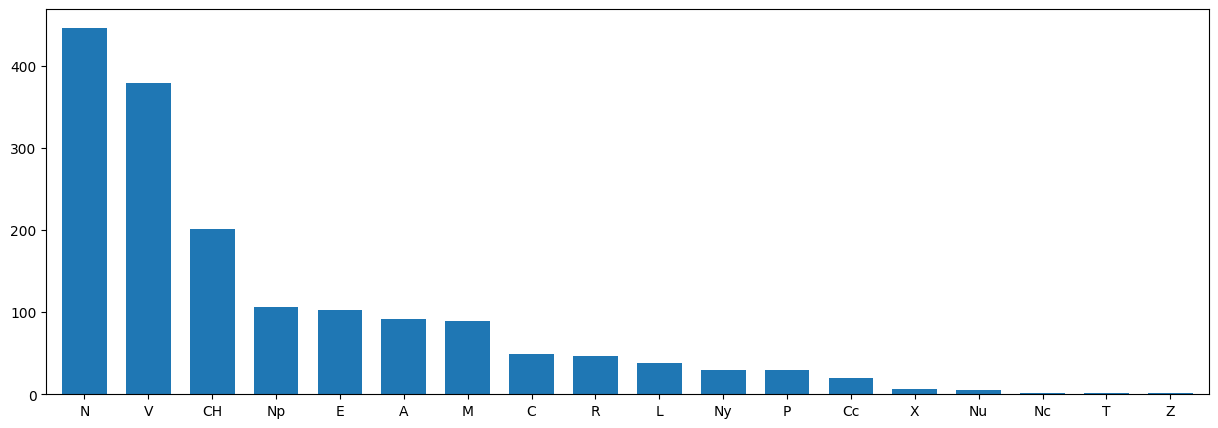

In [46]:
print('Các từ không nằm trong vocabs', end=': ')
k = 0
for word_tag, word in zip(train_gold, train_words):
    if word == '--unk--':
      k += 1
      print(word_tag.split()[0], end=', ')
plot_tag_counts(train_gold)
print('\n')
print(k)

In [47]:
#Đọc file test_gold: gồm từ vựng và nhãn của 30 câu còn lại, dùng để đánh giá kiểm thử
test_gold = open('data/test_gold.txt', encoding='utf-8').readlines()
print('Số lượng từ trong tập test_gold:', len(test_gold))
test_gold[0:5]

Số lượng từ trong tập test_gold: 502


[',\tCH\n', 'các\tL\n', 'hãng\tN\n', 'smartphone\tN\n', 'sẽ\tR\n']

In [48]:
#Đọc file test_words: chỉ gồm từ vựng của 30 câu còn lại, dùng để kiểm thử
test_words = preprocess(vocabs_dict, 'data/test_words.txt')
print('Số lượng từ trong tập test_words:', len(test_words))
test_words[0:5]

Số lượng từ trong tập test_words: 502


[',', 'các', 'hãng', 'smartphone', 'sẽ']

Các từ không nằm trong vocabs: Covid, Mẫu, Viêm, Giáng_sinh, Tân_Sơn_Nhất, TPHCM, Bắt, Kinh_doanh, Công_ty, TNHH, Bảo_hiểm_nhân_thọ, Dai-ichi, Học_phí, PV, Thanh_Niên, Pháp, trải_nghiệm, Đài, Fox_News, Tara_Reade, Thượng_viện, Khi, Bắc, 

23


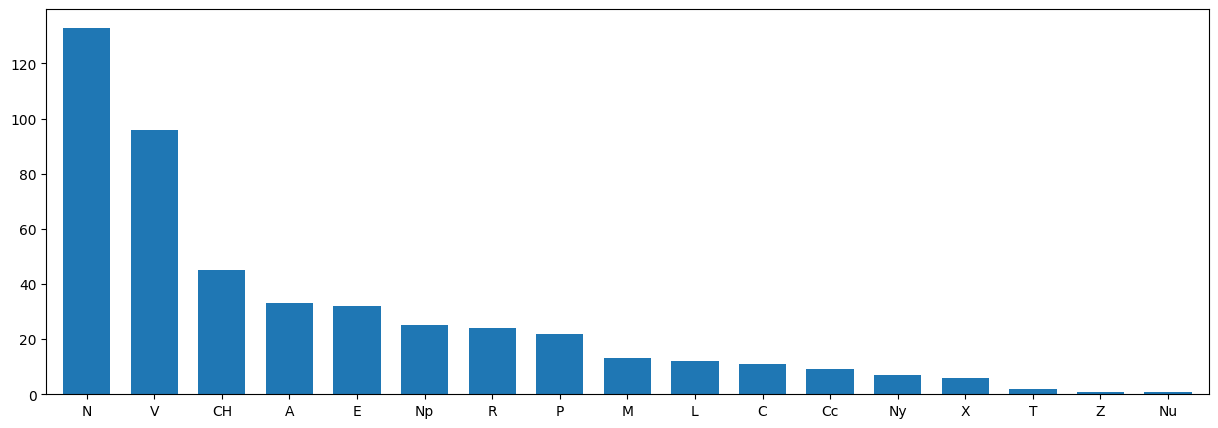

In [49]:
print('Các từ không nằm trong vocabs', end=': ')
k = 0
for word_tag, word in zip(test_gold, test_words):
    if word == '--unk--':
      k += 1
      print(word_tag.split()[0], end=', ')
plot_tag_counts(test_gold)
print('\n')
print(k)

Tạo các từ điển Transition Counts, Emission Counts, Tag Counts

In [50]:
#Hàm tách từ vựng và nhãn
def seperate_word_tag(word_tag, vocabs_dict):
    if not word_tag.split():
        word = '--n--'
        tag = '--s--'
    else:
        word, tag = word_tag.split()
        if word not in vocabs_dict:
          word = '--unk--'
    return word, tag

#Hàm xây dựng các từ điển (ctdl defaultdict)
'''
  transition_counts: Đếm số lần chuyển đổi trạng thái (chuyển đổi giữa 2 nhãn)
  emission_counts: Đếm số lần thể hiện nhãn trên 1 từ vựng
  tag_counts: Đếm số lần xuất hiện của 1 nhãn
  Đặt mã '--s--' là nhãn biểu thị bắt đầu 1 câu
'''
def create_dictionaries(train_gold, vocab):
    emission_counts = defaultdict(int)
    transition_counts = defaultdict(int)
    tag_counts = defaultdict(int)

    prev_tag = '--s--'
    for word_tag in train_gold:
        word, tag = seperate_word_tag(word_tag, vocab)

        transition_counts[(prev_tag, tag)] += 1
        emission_counts[(tag, word)] += 1
        tag_counts[tag] += 1
        prev_tag = tag
    return transition_counts, emission_counts, tag_counts

transition_counts, emission_counts, tag_counts = create_dictionaries(train_gold, vocabs_dict)
states = sorted(tag_counts.keys())
print('Số nhãn:', len(states))
print(states)

Số nhãn: 19
['--s--', 'A', 'C', 'CH', 'Cc', 'E', 'L', 'M', 'N', 'Nc', 'Np', 'Nu', 'Ny', 'P', 'R', 'T', 'V', 'X', 'Z']


In [51]:
tag_counts

defaultdict(int,
            {'N': 447,
             'Np': 107,
             'V': 380,
             'L': 38,
             'A': 92,
             'CH': 202,
             'E': 103,
             'P': 29,
             'Ny': 30,
             '--s--': 61,
             'R': 47,
             'M': 89,
             'C': 49,
             'X': 7,
             'Nc': 1,
             'Cc': 20,
             'T': 1,
             'Nu': 5,
             'Z': 1})

In [52]:
print("Transition examples: ")
for example in list(transition_counts.items())[:15]:
    print(example)

Transition examples: 
(('--s--', 'N'), 17)
(('N', 'N'), 83)
(('N', 'Np'), 42)
(('Np', 'V'), 15)
(('V', 'V'), 97)
(('V', 'N'), 118)
(('N', 'V'), 99)
(('V', 'L'), 17)
(('L', 'N'), 34)
(('N', 'A'), 32)
(('A', 'CH'), 18)
(('CH', 'E'), 9)
(('E', 'P'), 3)
(('P', 'V'), 9)
(('A', 'Ny'), 1)


In [53]:
print("Emission examples: ")
for example in list(emission_counts.items())[:15]:
    print (example)

Emission examples: 
(('N', 'Đồng_bằng'), 1)
(('N', 'sông'), 1)
(('Np', 'Cửu_Long'), 1)
(('V', 'được'), 15)
(('V', 'ưu_tiên'), 1)
(('V', 'bố_trí'), 2)
(('N', 'vốn'), 1)
(('V', 'đầu_tư'), 1)
(('L', 'các'), 22)
(('N', 'tuyến'), 2)
(('A', 'cao_tốc'), 2)
(('CH', ','), 90)
(('E', 'trong'), 11)
(('P', 'đó'), 4)
(('V', 'chú_trọng'), 1)


Thử nghiệm gán nhãn: Gãn nhãn xuất hiện thường xuyên nhất

In [54]:
#Hàm dự đoán nhãn thường xuyên nhất (dựa vào emission_counts)
def predict_pos(words, golds, emission_counts, vocabs_dict, states):
    num_correct = 0
    all_words = set(emission_counts.keys())

    for word, gold in zip(words, golds):
        gold_list = gold.split()
        if len(gold_list) != 2:
          continue
        else:
          true_label = gold_list[1]

        count_final = 0
        pos_final = ''
        if word not in vocabs_dict:
          continue

        for pos in states:
            if (pos, word) not in emission_counts:
              continue
            count = emission_counts[(pos, word)]

            if count > count_final:
                count_final = count
                pos_final = pos

        if pos_final == true_label:
          num_correct += 1
    accuracy = num_correct / len(golds)
    return accuracy

accuracy = predict_pos(train_words, train_gold, emission_counts, vocabs_dict, states)
print('Độ chính xác trên tập train:', accuracy)

Độ chính xác trên tập train: 0.9607957870099474


In [55]:
accuracy = predict_pos(test_words, test_gold, emission_counts, vocabs_dict, states)
print('Độ chính xác trên tập test:', accuracy)

Độ chính xác trên tập test: 0.48804780876494025


Tạo các ma trận Transition (A), Emission (B) cho mô hình Hidden Markov

In [56]:
#Hàm tạo ma trận chuyển đổi trạng thái A (từ transition_counts)
def create_transition_matrix(alpha, tag_counts, transition_counts):
    all_tags = sorted(tag_counts.keys())
    num_tags = len(all_tags)

    A = np.zeros((num_tags, num_tags))
    trans_keys = set(transition_counts.keys())

    for i in range(num_tags):
        for j in range(num_tags):
            count = 0
            key = (all_tags[i], all_tags[j])
            if key in transition_counts:
              count = transition_counts[key]

            count_prev_tag = tag_counts[all_tags[i]]
            A[i, j] = (count + alpha) / (count_prev_tag + alpha * num_tags)
    return A


alpha = 0.1 #Laplace smoothing
for i in range(len(states)):
  tag_counts.pop(i, None)

A = create_transition_matrix(alpha, tag_counts, transition_counts)
df = pd.DataFrame(
    A[:10, :10],
    index = states[:10],
    columns = states[:10]
)

df

,--s--,A,C,CH,Cc,E,L,M,N,Nc
--s--,0.017488,0.033386,0.065183,0.017488,0.001590,0.049285,0.001590,0.033386,0.271860,0.001590
A,0.001065,0.096912,0.043663,0.192758,0.001065,0.075612,0.033014,0.022364,0.214058,0.001065
C,0.001965,0.060904,0.021611,0.041257,0.001965,0.021611,0.060904,0.001965,0.316306,0.001965
CH,0.294752,0.015204,0.029917,0.015204,0.005395,0.044630,0.000490,0.029917,0.255517,0.000490
Cc,0.004566,0.050228,0.004566,0.004566,0.004566,0.050228,0.050228,0.004566,0.324201,0.004566
E,0.000953,0.010486,0.010486,0.010486,0.010486,0.010486,0.048618,0.048618,0.496663,0.000953
L,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.027569,0.854637,0.027569
M,0.001100,0.012101,0.034103,0.133113,0.012101,0.078108,0.001100,0.133113,0.309131,0.001100
N,0.000223,0.071508,0.029182,0.138338,0.011361,0.069280,0.018044,0.089329,0.185119,0.000223
Nc,0.034483,0.034483,0.034483,0.034483,0.034483,0.034483,0.034483,0.034483,0.379310,0.034483


In [57]:
A.shape

(19, 19)

In [58]:
#Xây dựng ma trận thể hiện / phát xạ B (dựa trên emission_counts)
def create_emission_matrix(alpha, tag_counts, emission_counts, vocabs):
    all_tags = sorted(tag_counts.keys())
    num_tags = len(tag_counts)
    num_words = len(vocabs)

    B = np.zeros((num_tags, num_words))
    emis_keys = set(list(emission_counts.keys()))

    for i in range(num_tags):
        for j in range(num_words):
            count = 0
            key = (all_tags[i], vocabs[j])
            if key in emission_counts.keys():
              count = emission_counts[key]

            count_tag = tag_counts[all_tags[i]]
            B[i, j] = (count + alpha) / (count_tag + alpha * num_words)
    return B

cidx  = ['Đồng_bằng', 'sông', 'Cửu_Long', 'được', 'ưu_tiên', 'bố_trí', 'vốn', 'đầu_tư', 'các', 'tuyến', 'cao_tốc', '--unk--']
rvals = ['N', 'V', 'CH', 'Cc', 'A', 'L', 'Np', 'Nc', 'X']
cols = [vocabs_dict[word] for word in cidx]
rows = [states.index(tag) for tag in rvals]

for i in range(len(states)):
  tag_counts.pop(i, None)
B = create_emission_matrix(alpha, tag_counts, emission_counts, list(vocabs_dict))

df = pd.DataFrame(B[np.ix_(rows, cols)], index=rvals, columns=cidx)
df

,Đồng_bằng,sông,Cửu_Long,được,ưu_tiên,bố_trí,vốn,đầu_tư,các,tuyến,cao_tốc,--unk--
N,0.000185,0.000185,0.000017,0.000017,0.000017,0.000017,0.000185,0.000017,0.000017,0.000353,0.000017,0.000017
V,0.000017,0.000017,0.000017,0.002568,0.000187,0.000357,0.000017,0.000187,0.000017,0.000017,0.000017,0.000017
CH,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
Cc,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
A,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000375,0.000018
L,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.003990,0.000018,0.000018,0.000018
Np,0.000018,0.000018,0.000196,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
Nc,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
X,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018


In [59]:
A = np.array([sublist[1:].tolist() for sublist in A]) #Xóa bớt cột --s--
B = B[1:]

In [60]:
df = pd.DataFrame(
    A[:5, :5],
    index = states[:5],
    columns = states[1:6]
)
df

,A,C,CH,Cc,E
--s--,0.033386,0.065183,0.017488,0.001590,0.049285
A,0.096912,0.043663,0.192758,0.001065,0.075612
C,0.060904,0.021611,0.041257,0.001965,0.021611
CH,0.015204,0.029917,0.015204,0.005395,0.044630
Cc,0.050228,0.004566,0.004566,0.004566,0.050228


In [61]:
A.shape #Kích thước thay đổi, dẫn đến công thức trong Viterbi thay đổi một chút so với trong Report.pdf

(19, 18)

In [62]:
B.shape

(18, 55008)

Khởi tạo thuật toán Viterbi

In [63]:
#Hàm khởi tạo Viterbi, tính toán giá trị khởi tạo cho cột đầu tiên
def viterbi_initialize(states, tag_counts, A, B, corpus, vocabs_dict):
    num_tags = len(tag_counts)
    s_idx = states.index('--s--') #s_idx = 0

    best_probs = np.zeros((num_tags, len(corpus)))
    best_paths = np.zeros((num_tags, len(corpus)), dtype=int)
    index = vocabs_dict[corpus[0]]
    for i in range(num_tags):
        if A[s_idx, i - 1] == 0:
          best_probs[i, 0] = float('-inf')
        else:
          best_probs[i, 0] = np.log(A[s_idx, i - 1]) + np.log(B[i - 1, index]) #Dùng i - 1 thay vì i như trong Report vì kích thước ma trận A đã thay đổi
    return best_probs, best_paths

In [64]:
best_probs_train, best_paths_train = viterbi_initialize(states, tag_counts, A, B, train_words, vocabs_dict)
print('best_probs_train[0, 0]:', best_probs_train[0, 0])
print('best_paths_train[0, 0]:', best_paths_train[0, 0])

best_probs_train[0, 0]: -17.359546940100284
best_paths_train[0, 0]: 0


In [65]:
best_probs_train.shape

(19, 1709)

In [66]:
best_paths_train.shape

(19, 1709)

In [67]:
best_probs_test, best_paths_test = viterbi_initialize(states, tag_counts, A, B, test_words, vocabs_dict)
print('best_probs_test[0, 0]:', best_probs_test[0, 0])
print('best_paths_test[0, 0]:', best_paths_test[0, 0])

best_probs_test[0, 0]: -17.359546940100284
best_paths_test[0, 0]: 0


In [68]:
best_probs_test.shape

(19, 502)

In [69]:
best_paths_test.shape

(19, 502)

Forward

In [70]:
#Hàm Viterbi Forward tiến hành điền các giá trị còn lại theo chiến lược quy hoạch động
def viterbi_forward(A, B, corpus, best_probs, best_paths, vocabs_dict):
    num_tags = best_probs.shape[0]

    for i in range(1, len(corpus)):
        if i % 5000 == 0:
          print(f'Processed {i} words...')

        for j in range(num_tags):
            best_prob_i = float('-inf')
            best_path_i = None

            for k in range(num_tags):
                index = vocabs_dict[corpus[i]]
                prob = best_probs[k, i - 1] + np.log(A[k, j - 1]) + np.log(B[j - 1, index])

                if prob > best_prob_i:
                    best_prob_i = prob
                    best_path_i = k

            best_probs[j, i] = best_prob_i
            best_paths[j, i] = best_path_i

    return best_probs, best_paths


In [71]:
best_probs_train, best_paths_train = viterbi_forward(A, B, train_words, best_probs_train, best_paths_train, vocabs_dict)
print('best_probs_train[0, 1]:', best_probs_train[0, 1])
print('best_paths_train[0, 4]:', best_paths_train[0, 4])

best_probs_train[0, 1]: -29.22273512484214
best_paths_train[0, 4]: 16


In [72]:
best_probs_test, best_paths_test = viterbi_forward(A, B, test_words, best_probs_test, best_paths_test, vocabs_dict)
print('best_probs_test[0, 1]:', best_probs_test[0, 1])
print('best_paths_test[0, 4]:', best_paths_test[0, 4])

best_probs_test[0, 1]: -26.72965883454188
best_paths_test[0, 4]: 6


Backward

In [73]:
#Hàm Viterbi Backward truy vết trên bảng tìm đường đi tốt nhất
def viterbi_backward(best_probs, best_paths, corpus, states):
    m = best_paths.shape[1]
    z = [None] * m
    pred = [None] * m

    best_prob_for_last_word = float('-inf')
    num_tags = best_probs.shape[0]

    for k in range(num_tags):
        if best_probs[k, m - 1] > best_prob_for_last_word:
            best_prob_for_last_word = best_probs[k, m - 1]
            z[m - 1] = k

    pred[m - 1] = states[z[m - 1]]
    for i in range(m - 1, -1, -1):
        z[i - 1] = best_paths[z[i], i]
        pred[i - 1] = states[z[i - 1]]
    return pred

In [74]:
train_pred = viterbi_backward(best_probs_train, best_paths_train, train_words, states)
test_pred = viterbi_backward(best_probs_test, best_paths_test, test_words, states)
m = len(test_pred)

print('Dự đoán cho test_pred[0:20]:')
print(test_words[:20])
print(test_pred[:20])

Dự đoán cho test_pred[0:20]:
[',', 'các', 'hãng', 'smartphone', 'sẽ', 'cho', 'người', 'dùng', 'đặt', 'trước', 'ngay', 'sau', 'khi', 'ra_mắt', 'sản_phẩm', '.', '--n--', 'AstraZeneca', 'cam_kết', 'sẽ']
['V', 'L', 'N', 'Np', 'R', 'E', 'N', 'V', 'N', 'E', 'N', 'N', 'N', 'V', 'N', 'CH', 'N', 'V', 'V', 'R']


Dự đoán trên tập test

In [75]:
for word, tag in zip(test_words, test_pred):
    if word == '--n--':
      print()
      print('\t')
    else:
      print(f'{word}/{tag}', end=' ')

,/V các/L hãng/N smartphone/Np sẽ/R cho/E người/N dùng/V đặt/N trước/E ngay/N sau/N khi/N ra_mắt/V sản_phẩm/N ./CH 
	
AstraZeneca/V cam_kết/V sẽ/R cung_cấp/V hàng/N trăm/M triệu/M liều/N vắc_xin/V --unk--/N -/CH 19/M cho/E các/L nước/N thu_nhập/N thấp/Np và/Cc trung_bình/Np ,/CH thậm_chí/R cung_cấp/V phi/V lợi_nhuận/N cho/E các/L quốc_gia/N nghèo/Np ./CH 
	
--unk--/V xe/N mới/A không_chỉ/C được/V trang_bị/N động_cơ/V mạnh_mẽ/N hơn/A mà_còn/C tinh_chỉnh/N về/E ngoại_hình/N ./CH 
	
Kế_hoạch/V trở_lại/V thi_đấu/N quần_vợt/V đỉnh_cao/N của/E Roger_Federer/Np đã/R không_thể/R diễn/V ra/V như/N dự_kiến/V ./CH 
	
Ở/V giải/V đấu/N này/P ,/CH Andy_Murray/Np sẽ/R được/V nhận/N suất/V đặc_cách/N tham_dự/Np ./CH 
	
Đây/P là/V hãng/N hàng_không/V lữ_hành/N cung_cấp/V các/L dịch_vụ/N vận_chuyển/V hàng/N không/Np và/Cc các/L gói/N du_lịch/V trong/E nước/N và/Cc quốc_tế/N ./CH 
	
--unk--/V gan/N do/E rượu/N là/V quá_trình/N viêm/N cấp_tính/Np hoặc/Cc mạn_tính/N ở/E gan/N do/E uống/N rượu/Np ./CH 
	
Cá

Đánh giá mô hình HMM + Viterbi

In [76]:
from sklearn.metrics import classification_report
def report(pred, gold):
    y_pred = []
    y_true = []

    for prediction, word_tag in zip(pred, gold):
        word_tag_tuple = word_tag.split()
        if len(word_tag_tuple) != 2:
          continue

        word, tag = word_tag_tuple
        y_pred.append(prediction)
        y_true.append(tag)

    print(classification_report(y_true, y_pred, zero_division=0))
    return y_pred, y_true

print('Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập train:\n')
y_pred, y_true_train = report(train_pred, train_gold)

Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập train:

              precision    recall  f1-score   support

           A       1.00      0.96      0.98        92
           C       1.00      0.92      0.96        49
          CH       1.00      1.00      1.00       202
          Cc       1.00      1.00      1.00        20
           E       1.00      0.99      1.00       103
           L       1.00      0.97      0.99        38
           M       1.00      0.96      0.98        89
           N       0.95      0.99      0.97       447
          Nc       0.00      0.00      0.00         1
          Np       0.96      0.96      0.96       107
          Nu       0.57      0.80      0.67         5
          Ny       1.00      0.90      0.95        30
           P       1.00      0.86      0.93        29
           R       0.98      0.96      0.97        47
           T       0.00      0.00      0.00         1
           V       0.97      0.99      0.98       380
   

In [77]:
print('Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập test:\n')
y_pred, y_true_test = report(test_pred, test_gold)

Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập test:

              precision    recall  f1-score   support

           A       0.87      0.39      0.54        33
           C       1.00      0.91      0.95        11
          CH       0.95      0.93      0.94        45
          Cc       1.00      0.89      0.94         9
           E       0.97      0.94      0.95        32
           L       1.00      0.83      0.91        12
           M       1.00      0.77      0.87        13
           N       0.61      0.69      0.65       133
          Np       0.29      0.40      0.34        25
          Nu       1.00      1.00      1.00         1
          Ny       1.00      0.43      0.60         7
           P       0.88      0.32      0.47        22
           R       0.81      0.71      0.76        24
           T       0.00      0.00      0.00         2
           V       0.52      0.68      0.59        96
           X       0.00      0.00      0.00         6
    

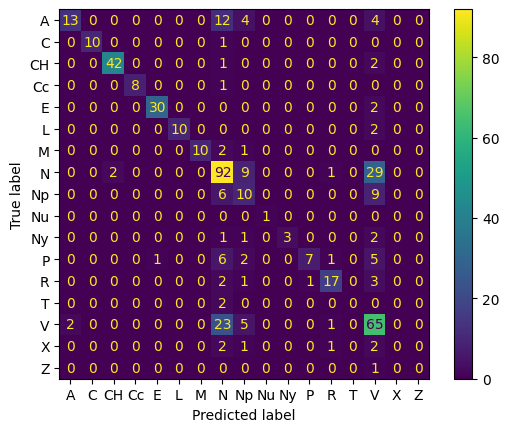

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
tag_list = ['A', 'C', 'CH', 'Cc', 'E', 'L', 'M', 'N', 'Np', 'Nu', 'Ny', 'P', 'R', 'T', 'V', 'X', 'Z']
cm = confusion_matrix(y_true_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tag_list).plot()

Phần gán nhãn bằng các thư viện để so sánh được thực hiện ở file pivy_vncore_pos_tagging.ipynb